# Mini-project 1: WARMUP - A dataset with CSV and JSON

In this mini-project, we will generate a fake dataset to warmup with dictionaries, functional programming, and the following libraries: `csv`, `json`, `itertools`, `numpy` and `matplotlib`.

## 1. Generate composed names
### 1.1. Define the generation function

Write a custom function that returns a list of permutations to create fake composed names separated by a dash, e.g. `Alice-Maria`. 

Be careful:
* The function has 1 input parameter: a list of first names ; and returns the list of permutations with a "-" in-between
* The output list must also include the opposite, e.g. `Alice-Maria` and also `Maria-Alice`
* The output list must not contain repetitions, e.g. `Bob-Bob` (this is a permutation, not a product)

Although Python has tools to do this in some modules, it is a good exercise to start from an exmpty list and fill it progressively with functions we know.

In [22]:
def genFunc(name_list):
    permutations = []
    for name1 in name_list:
        for name2 in name_list:
            # Skip repetitions of the same name
            if name1 == name2:
                continue
                
            new_name = name1 + '-' + name2
            if not new_name in permutations:
                permutations.append(new_name)
    
    return permutations

In [28]:
composed_names = genFunc(["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"])

### 1.2. Function call and comparison to other functions

Here is a list of 11 first names
```
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]
```
The function call with this list must return exactly 110 composed names (i.e. the exact number of permutations w/o repetition of 11 elements) stored in a variables named `composed_names`.


Use the magic `%timeit` to compare the speed of execution of your custom function with [`itertools.permutations`](https://docs.python.org/3/library/itertools.html). Compare:
- The average duration of the only call to `itertools.permutations` 
- The average duration of the call to `itertools.permutations` converted in list
- The average duration of the list-comprehension of the actual composed names separated by a dash
- The average duration of your custom function

In [12]:
names = ["Bob", "Alice", "Maria", "Albert", "Paul", "Alex", "Luc", "Robert", "Dylan", "Léa", "Richard"]

In [1]:
from itertools import permutations

In [15]:
output=[]
for i in list(permutations(names, 2)):
    output.append("-".join(i))
print(output)

['Bob-Alice', 'Bob-Maria', 'Bob-Albert', 'Bob-Paul', 'Bob-Alex', 'Bob-Luc', 'Bob-Robert', 'Bob-Dylan', 'Bob-Léa', 'Bob-Richard', 'Alice-Bob', 'Alice-Maria', 'Alice-Albert', 'Alice-Paul', 'Alice-Alex', 'Alice-Luc', 'Alice-Robert', 'Alice-Dylan', 'Alice-Léa', 'Alice-Richard', 'Maria-Bob', 'Maria-Alice', 'Maria-Albert', 'Maria-Paul', 'Maria-Alex', 'Maria-Luc', 'Maria-Robert', 'Maria-Dylan', 'Maria-Léa', 'Maria-Richard', 'Albert-Bob', 'Albert-Alice', 'Albert-Maria', 'Albert-Paul', 'Albert-Alex', 'Albert-Luc', 'Albert-Robert', 'Albert-Dylan', 'Albert-Léa', 'Albert-Richard', 'Paul-Bob', 'Paul-Alice', 'Paul-Maria', 'Paul-Albert', 'Paul-Alex', 'Paul-Luc', 'Paul-Robert', 'Paul-Dylan', 'Paul-Léa', 'Paul-Richard', 'Alex-Bob', 'Alex-Alice', 'Alex-Maria', 'Alex-Albert', 'Alex-Paul', 'Alex-Luc', 'Alex-Robert', 'Alex-Dylan', 'Alex-Léa', 'Alex-Richard', 'Luc-Bob', 'Luc-Alice', 'Luc-Maria', 'Luc-Albert', 'Luc-Paul', 'Luc-Alex', 'Luc-Robert', 'Luc-Dylan', 'Luc-Léa', 'Luc-Richard', 'Robert-Bob', 'Robert-

In [16]:
%timeit permutations(names, 2)

210 ns ± 24.1 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [17]:
%timeit list(permutations(names, 2))

6.03 µs ± 726 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [70]:
%timeit ["-".join(n) for n in permutations(names, 2)]

19.5 µs ± 3.27 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [24]:
%timeit genFunc(names)

114 µs ± 2.92 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 2. Generate characters as first + last names
## 2.1. Define the generation function

Write a custom function that returns a list of combinations of composed names and last names separated by a space, e.g. `Paul-Robert Loiseau`.

Be careful:
* The function has 2 input parameters: a list of composed first names and a list of last names ; and returns a list of combinations
* It means that for each last name, we will insert in the resulting list as many characters as there are names in the list of first names
* Your list must be in this order: **first name and then last name**, thus it must not contain `Tournesol Paul-Alex` for instance.


In [30]:
def get_permutations(composed_names, last_names):
    combinations = []
    for lname in last_names:
        for name in composed_names:
            combinations.append(" ".join((name, lname)))
    
    return combinations

In [33]:
surnames = ["Dupont", "Dupond", "Haddock", "Tournesol", "Castafiore", "Lampion", "Lopez", "Loiseau", "Müller", "Sanzot"]
characters = get_permutations(composed_names, surnames)
print(len(characters))

1100


### 2.2. Function call

Here is a list of 11 last names (from the stories of Tintin):
```
surnames = ["Dupont", "Dupond", "Haddock", "Tournesol", "Castafiore", "Lampion", "Lopez", "Loiseau", "Müller", "Sanzot"]
```

The function calls of the function from `3.1.2.` and this one must finally return exactly 1100 characters, stored in a variable named `characters`.

Use the magic `%timeit` to compare the speed of execution of your custom function with [`itertools.product`](https://docs.python.org/3/library/itertools.html). Compare:
- The average duration of the only call to `itertools.product` 
- The average duration of the call to `itertools.product` converted in list
- The average duration of the list-comprehension of the actual composed names separated by a dash
- The average duration of your custom function

In [35]:
from itertools import product

In [39]:
%timeit product(composed_names, surnames)

412 ns ± 12.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [40]:
%timeit list(product(composed_names, surnames))

29.9 µs ± 657 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [69]:
%timeit [" ".join(name) for name in product(composed_names, surnames)]

164 µs ± 2.3 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [72]:
%timeit [name[0] + " " + name[1] for name in product(composed_names, surnames)]

214 µs ± 4.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [44]:
%timeit get_permutations(composed_names, surnames)

180 µs ± 8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# 3. Import data from a CSV file

We will associate to these characters exam marks generated by another program in a CSV file.
Use the documentation of the [`csv`](https://docs.python.org/3/library/csv.html) module for the next questions:

## 3.1. Load the file

Manually download the file [`exams.csv`](https://raw.githubusercontent.com/ymollard/python-advanced-slides/main/exercises/data/exams.csv?token=AAZEO6XULYU2ZIIZJLGSD4DBVANQC). With Python, open it, load its content, and transform-it in order to get marks by discipline, for instance `math_marks = [15, 13...]`

In [71]:
import csv
import numpy
with open('exams.csv') as f:
    spamreader = csv.DictReader(f)
    french_marks = []
    maths_marks = []
    philosophy_marks = []    
    for row in spamreader:
        #print(row)
        french_marks.append(float(row['french']))
        maths_marks.append(float(row['maths']))
        philosophy_marks.append(float(row['philosophy']))        
    
    d = { 'french' : french_marks, 'maths' : maths_marks, 'philo' : philosophy_marks }
    for k in d:
        print('{} mean={} std={}'.format(k, numpy.mean(d[k]), numpy.std(d[k])))

french mean=10.308181818181819 std=3.4537234667998487
maths mean=11.959545454545454 std=4.760581493580883
philo mean=8.563181818181818 std=4.495033508180937


Install the numerical module `numpy` with pip in your venv (in the PyCharm system terminal).

Use functions `numpy.mean()` et `numy.std()` to get the mean and the standard deviation of marks by discipline

## 3.2. Plot the density of marks

A density plot shows, for each of the 40 possible notes in the horizontal axis (from 0 to 20 with a 0.5 step), the number of occurences of this mark, on the vertical axis. This is a way to check how data are distributed. We could build this plot by hand but popular Python libraries do it for us. 

Install the statistical module `pandas`, the plot module `matplotlib` and the scientific module `scipy` with pip in your venv (in the PyCharm system terminal).

Use [pandas.DataFrame.plot.density](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.density.html) to plot the density of marks.

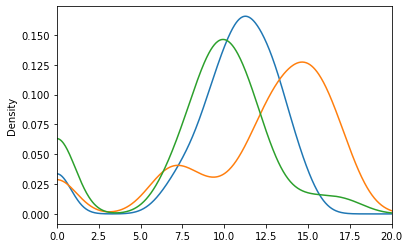

In [78]:
import pandas as pd
for k in d:
    s = pd.Series(d[k])
    ax = s.plot.kde().set_xlim(0,20)

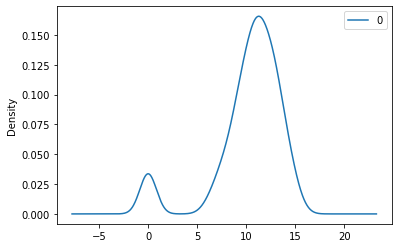

In [81]:
import pandas as pd
df = pd.DataFrame(french_marks).plot.density()

## 3. Create an adapter data structure
Transform the data you read in a data structure made of nested dictionaries and/or lists.

The structure must represtent the name of students as well as their marks to the 3 exams

For instance:
```
{
  "Alice-Maria Lampion" : {"math": 15, "french": 10, "philosophy": 11.5},
  "Paul-Alex Loiseau" : {"math": 8.5, "french": 17, "philosophy": 15},
  ...
}
```


In [86]:
dataset = {}
for i, c in enumerate(characters):
    #dataset[c] = {'math': maths_marks[i], 'french' : french_marks[i], 'philosophy' : philosophy_marks[i]}
    dataset[c] = dict(zip(['math', 'french', 'philosophy'], [maths_marks[i], french_marks[i], philosophy_marks[i]]))

In [87]:
import json
with open('dataset.json', 'w') as f:
    json.dump(dataset, f)

## 3.1. Save you data structure in JSON

Import module `json` and use `json.dump()` to save your database un a file: `dataset.json`

Protip: add the paramter `indent=4` in order to make your JSON file readable by a human with a simple text editor. Open the file without Python to observer.

In [ ]:
# My code saving the data structure in JSON here []

## 3.2. Read and check

We are now going to check that we can load properly the JSON file with `json.load()`.

We will first crash voluntarily this Jupyter Notebook in order to start from scratch. Your code will remain in your browser but all variables will be lost.

In [ ]:
# We volontarily end the interpreter here to make sure all previous variables are cleared up.
import os
os._exit(0)

Now re-loard the JSON file into a Pytohn variable and consult the math mark of Paul-Robert Müller :

In [ ]:
# My code loading the saved JSON dataset here [...]

## 3.3. Optional: adapt to malformed data

You crated a JSON file but some file already existed in the current directory. However this second file has many problems.

**Your goal**: Write a Python function that:
* opens all files from the current directory
* check if this is actually a file (not a directory)
* check if this is a JSON file (e.g. ends with `.json`)
* load the data and adapt to malformed data
* compute the mean in mathematics of all students in that directory

Use the module [`pathlib`](https://docs.python.org/fr/3/library/pathlib.html) to handle file paths, existence and type. Take note that `os.path` is now deprecated.

In [ ]:
# My optional code loading malformed JSON files here [...]

# Resources

* itertools: https://docs.python.org/3/library/itertools.html
* Functional programming: https://docs.python.org/3/howto/functional.html
* csv: https://docs.python.org/3/library/csv.html
* json: https://docs.python.org/fr/3/library/json.html
* pandas: https://pandas.pydata.org/pandas-docs/stable/

